# Demonstration: Anomaly detection algorithm

In [1]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars
import joblib  # Writing and loading

import sys
sys.path.insert(0, '../')
import vqe as vqe
import anomaly as ae

##############

In [2]:
N = 8
J = 1

epochs = 30000
lr = 0.025


In [3]:
myenc  = ae.encoder(vqe.load_vqe('../data/vqe.pkl'), ae.anomaly_circuit)
myenc2 = ae.encoder(vqe.load_vqe('../data/vqe.pkl'), ae.anomaly_circuit2)

+--- CIRCUIT ---+
0: ──RY(0.00)──RX(0.00)──||─╭C────────────────────||──RY(0.00)──RX(0.00)──||─╭C──────────────────
1: ──RY(0.00)──RX(0.00)──||─╰X─╭C─────────────────||──RY(0.00)──RX(0.00)──||─╰X─╭C───────────────
2: ──RY(0.00)──RX(0.00)──||────╰X─╭C──────────────||──RY(0.00)──RX(0.00)──||────╰X─╭C────────────
3: ──RY(0.00)──RX(0.00)──||───────╰X─╭C───────────||──RY(0.00)──RX(0.00)──||───────╰X─╭C─────────
4: ──RY(0.00)──RX(0.00)──||──────────╰X─╭C────────||──RY(0.00)──RX(0.00)──||──────────╰X─╭C──────
5: ──RY(0.00)──RX(0.00)──||─────────────╰X─╭C─────||──RY(0.00)──RX(0.00)──||─────────────╰X─╭C───
6: ──RY(0.00)──RX(0.00)──||────────────────╰X─╭C──||──RY(0.00)──RX(0.00)──||────────────────╰X─╭C
7: ──RY(0.00)──RX(0.00)──||───────────────────╰X──||──RY(0.00)──RX(0.00)──||───────────────────╰X

───||──RY(0.00)──||──||──RY(0.00)─────────────╭C─────||──RY(8.00)──────────────╭C─────||──RY(16.00)─┤
───||──RY(0.00)──||──||──RY(1.00)─────────────│──╭C──||──RY(9.00)──────────────│──╭C──||──RY(17

Cost: 0.15520930290222168: 100%|█████████| 30000/30000 [00:38<00:00, 775.32it/s]


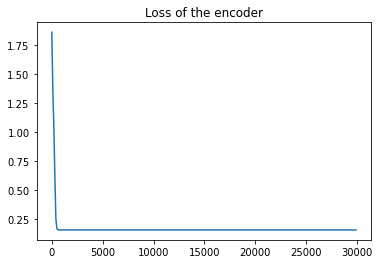

In [4]:
myenc.train(lr, epochs, [80,90], circuit = True, plot = True)

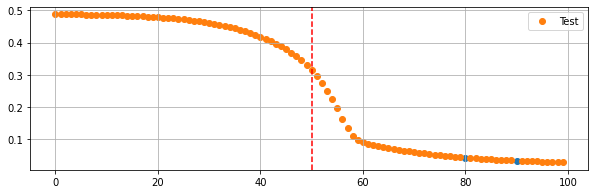

In [5]:
myenc.show_compression_isingchain()

+--- CIRCUIT ---+
0: ──RY(0.00)──RX(0.00)──||─╭C────────────────────||──RY(0.00)──RX(0.00)──||─╭C──────────────────
1: ──RY(0.00)──RX(0.00)──||─╰X─╭C─────────────────||──RY(0.00)──RX(0.00)──||─╰X─╭C───────────────
2: ──RY(0.00)──RX(0.00)──||────╰X─╭C──────────────||──RY(0.00)──RX(0.00)──||────╰X─╭C────────────
3: ──RY(0.00)──RX(0.00)──||───────╰X─╭C───────────||──RY(0.00)──RX(0.00)──||───────╰X─╭C─────────
4: ──RY(0.00)──RX(0.00)──||──────────╰X─╭C────────||──RY(0.00)──RX(0.00)──||──────────╰X─╭C──────
5: ──RY(0.00)──RX(0.00)──||─────────────╰X─╭C─────||──RY(0.00)──RX(0.00)──||─────────────╰X─╭C───
6: ──RY(0.00)──RX(0.00)──||────────────────╰X─╭C──||──RY(0.00)──RX(0.00)──||────────────────╰X─╭C
7: ──RY(0.00)──RX(0.00)──||───────────────────╰X──||──RY(0.00)──RX(0.00)──||───────────────────╰X

───||──RY(0.00)──||──||──RY(0.00)─────────────╭C─────||──RY(8.00)──────────────╭C────────||
───||──RY(0.00)──||──||──RY(1.00)─────────────│──╭C──||──RY(9.00)──────────────│──╭C─────||
───||──RY(0.0

Cost: 0.07029323279857635: 100%|█████████| 30000/30000 [00:55<00:00, 537.76it/s]


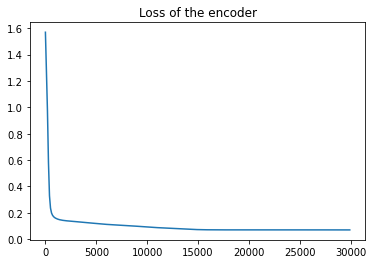

In [6]:
myenc2.train(lr, epochs, [80,90], circuit = True, plot = True)

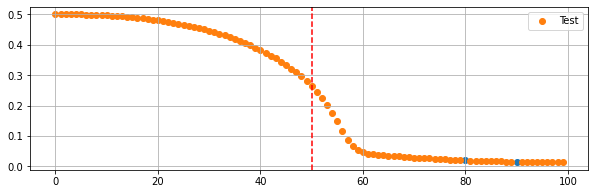

In [7]:
myenc2.show_compression_isingchain()

In [8]:
myenc  = ae.encoder(vqe.load_vqe('../data/vqe.pkl'), ae.anomaly_circuit)
myenc2 = ae.encoder(vqe.load_vqe('../data/vqe.pkl'), ae.anomaly_circuit2)

+--- CIRCUIT ---+
0: ──RY(0.00)──RX(0.00)──||─╭C────────────────────||──RY(0.00)──RX(0.00)──||─╭C──────────────────
1: ──RY(0.00)──RX(0.00)──||─╰X─╭C─────────────────||──RY(0.00)──RX(0.00)──||─╰X─╭C───────────────
2: ──RY(0.00)──RX(0.00)──||────╰X─╭C──────────────||──RY(0.00)──RX(0.00)──||────╰X─╭C────────────
3: ──RY(0.00)──RX(0.00)──||───────╰X─╭C───────────||──RY(0.00)──RX(0.00)──||───────╰X─╭C─────────
4: ──RY(0.00)──RX(0.00)──||──────────╰X─╭C────────||──RY(0.00)──RX(0.00)──||──────────╰X─╭C──────
5: ──RY(0.00)──RX(0.00)──||─────────────╰X─╭C─────||──RY(0.00)──RX(0.00)──||─────────────╰X─╭C───
6: ──RY(0.00)──RX(0.00)──||────────────────╰X─╭C──||──RY(0.00)──RX(0.00)──||────────────────╰X─╭C
7: ──RY(0.00)──RX(0.00)──||───────────────────╰X──||──RY(0.00)──RX(0.00)──||───────────────────╰X

───||──RY(0.00)──||──||──RY(0.00)─────────────╭C─────||──RY(8.00)──────────────╭C─────||──RY(16.00)─┤
───||──RY(0.00)──||──||──RY(1.00)─────────────│──╭C──||──RY(9.00)──────────────│──╭C──||──RY(17

Cost: 0.011095598340034485: 100%|████████| 30000/30000 [00:39<00:00, 760.13it/s]


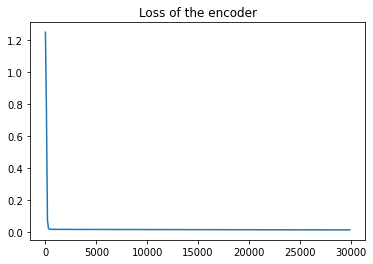

In [9]:
myenc.train(lr, epochs, [0,10], circuit = True, plot = True)

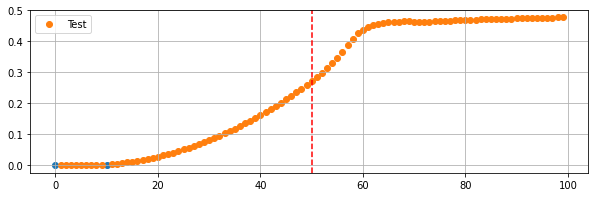

In [10]:
myenc.show_compression_isingchain()

+--- CIRCUIT ---+
0: ──RY(0.00)──RX(0.00)──||─╭C────────────────────||──RY(0.00)──RX(0.00)──||─╭C──────────────────
1: ──RY(0.00)──RX(0.00)──||─╰X─╭C─────────────────||──RY(0.00)──RX(0.00)──||─╰X─╭C───────────────
2: ──RY(0.00)──RX(0.00)──||────╰X─╭C──────────────||──RY(0.00)──RX(0.00)──||────╰X─╭C────────────
3: ──RY(0.00)──RX(0.00)──||───────╰X─╭C───────────||──RY(0.00)──RX(0.00)──||───────╰X─╭C─────────
4: ──RY(0.00)──RX(0.00)──||──────────╰X─╭C────────||──RY(0.00)──RX(0.00)──||──────────╰X─╭C──────
5: ──RY(0.00)──RX(0.00)──||─────────────╰X─╭C─────||──RY(0.00)──RX(0.00)──||─────────────╰X─╭C───
6: ──RY(0.00)──RX(0.00)──||────────────────╰X─╭C──||──RY(0.00)──RX(0.00)──||────────────────╰X─╭C
7: ──RY(0.00)──RX(0.00)──||───────────────────╰X──||──RY(0.00)──RX(0.00)──||───────────────────╰X

───||──RY(0.00)──||──||──RY(0.00)─────────────╭C─────||──RY(8.00)──────────────╭C────────||
───||──RY(0.00)──||──||──RY(1.00)─────────────│──╭C──||──RY(9.00)──────────────│──╭C─────||
───||──RY(0.0

Cost: 0.010833725333213806: 100%|████████| 30000/30000 [00:56<00:00, 534.31it/s]


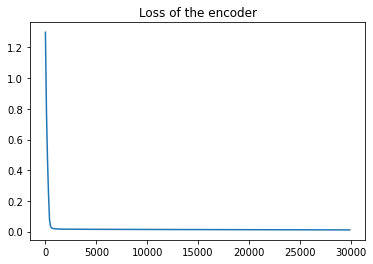

In [11]:
myenc2.train(lr, epochs, [0,10], circuit = True, plot = True)

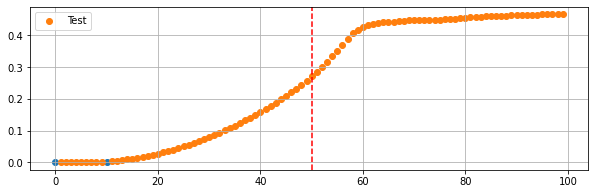

In [12]:
myenc2.show_compression_isingchain()